In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:\Student_Performance.csv")

In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
data.duplicated().sum()

127

In [6]:
data = data.drop_duplicates()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

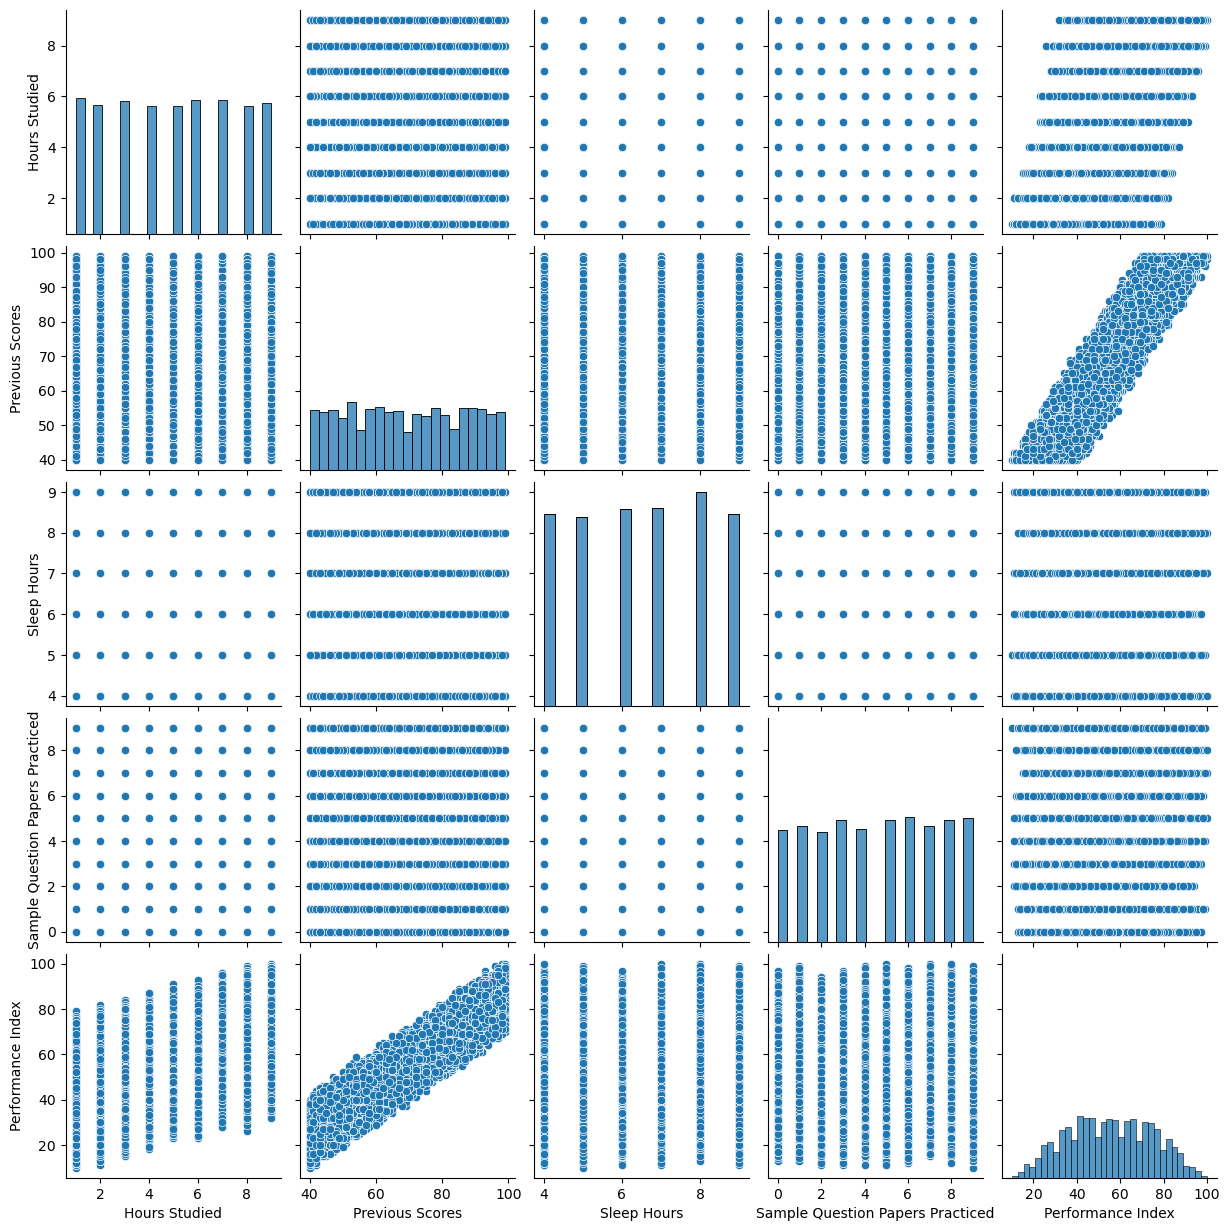

In [7]:
sns.pairplot(data)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Extracurricular Activities'] = label_encoder.fit_transform(data['Extracurricular Activities'])

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Extracurricular Activities', ylabel='Count'>

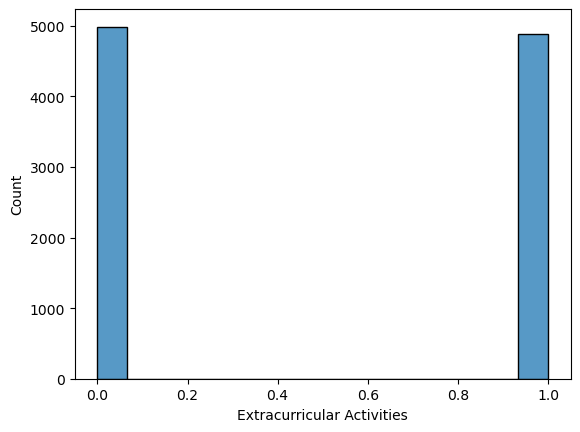

In [9]:
sns.histplot(data['Extracurricular Activities'])

In [10]:
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,0.494986,6.531652,4.583004,55.216651
std,2.589081,17.325601,0.500000,1.697683,2.867202,19.208570
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


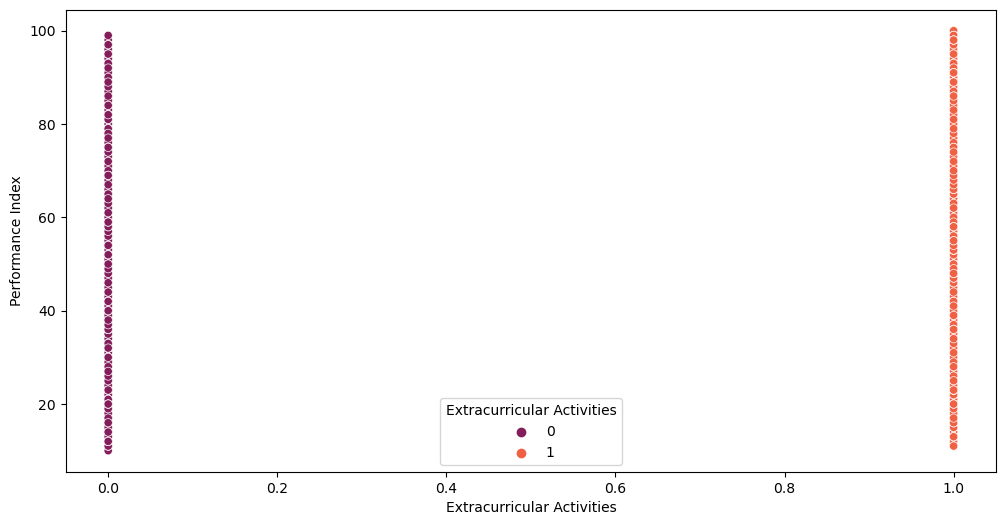

In [11]:
 plt.figure(figsize=(12, 6))
sns.scatterplot(x='Extracurricular Activities', y='Performance Index',data=data ,hue='Extracurricular Activities',palette='rocket')
plt.show()

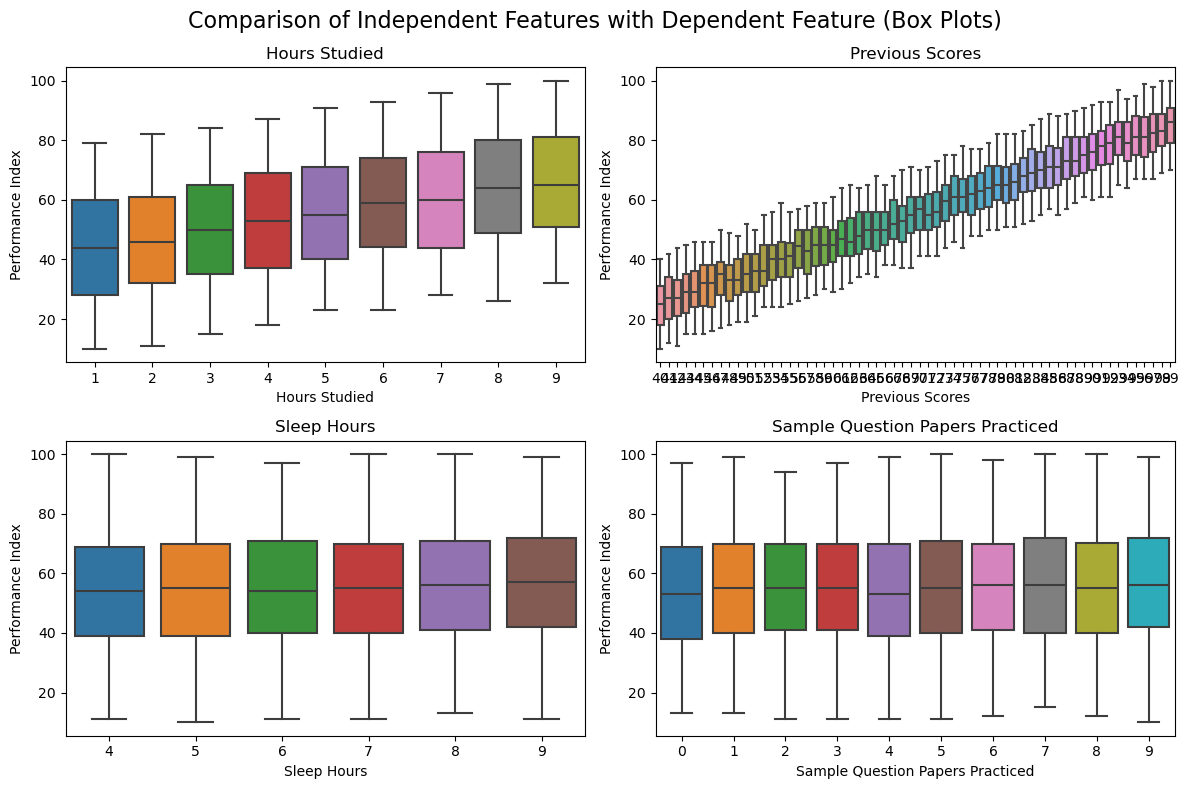

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # 2x2 grid of subplots
fig.suptitle('Comparison of Independent Features with Dependent Feature (Box Plots)', fontsize=16)

sns.boxplot(x='Hours Studied', y='Performance Index', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Hours Studied')

sns.boxplot(x='Previous Scores', y='Performance Index', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Previous Scores')

sns.boxplot(x='Sleep Hours', y='Performance Index', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Sleep Hours')

sns.boxplot(x='Sample Question Papers Practiced', y='Performance Index', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Sample Question Papers Practiced')

plt.tight_layout()

In [13]:
X = data.drop('Performance Index',axis=1)
Y = data['Performance Index']
X.shape

(9873, 5)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=True)

In [15]:
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers

In [16]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

In [17]:
model.compile(optimizer=optimizers.AdamW(),loss='mse',metrics=['mse'])
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [18]:
history = model.fit(X_train, Y_train, validation_data= (X_test, Y_test), epochs=100,batch_size=200, callbacks=[early_stopping])

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1596.3555 - mse: 1596.3555 - val_loss: 240.8149 - val_mse: 240.8149
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141.9223 - mse: 141.9223 - val_loss: 74.8486 - val_mse: 74.8486
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.7475 - mse: 73.7475 - val_loss: 72.5529 - val_mse: 72.5529
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70.6616 - mse: 70.6616 - val_loss: 70.0326 - val_mse: 70.0326
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67.0541 - mse: 67.0541 - val_loss: 67.1931 - val_mse: 67.1931
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65.1565 - mse: 65.1565 - val_loss: 64.0878 - val_mse: 64.0878
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62.8900 - mse: 62.8900 - val_loss: 60.6520 - val_mse: 60.6520
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.1549 - mse: 57.1549 - val_loss: 56.9463 - val_mse: 56.9463
Epoch 9/100
40/40 ━━━━━━

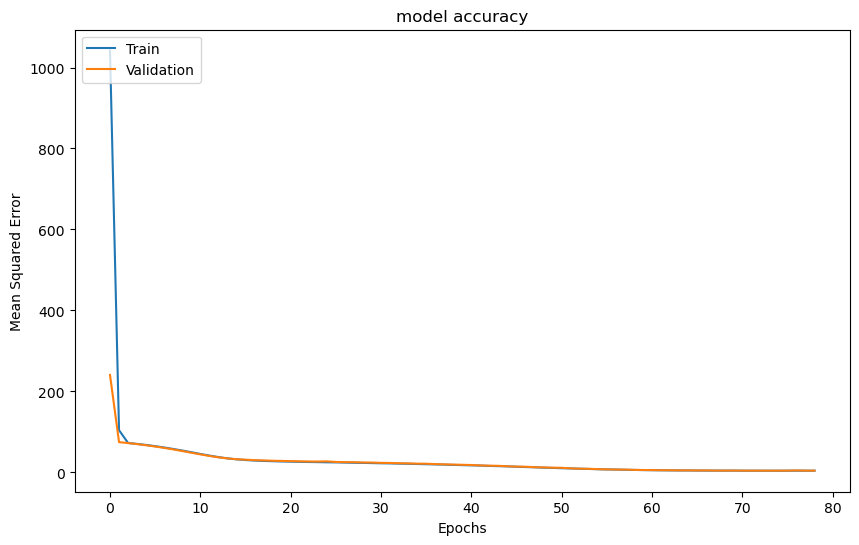

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('model accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [20]:
y_pred = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(Y_test, y_pred)
r2

0.9881497133458846